In [2]:
%matplotlib notebook

In [3]:
import sys
sys.path.append("/Users/massin/Google Drive/Projects/NaiNo-Kami/Py/NnK")
import eew 
import obspy
import matplotlib
from imp import reload

In [1]:
! ssh -fNT -L 18000:10.10.128.89:18000 sysop@45.162.205.14
#! ssh -fNT -L 8080:localhost:8080 sysop@45.162.205.14

In [11]:
if False:
    from obspy.clients.fdsn import Client
    client = Client("http://localhost:8080/")#http://163.178.170.203:8080/")

    network = client.get_stations(level='station',
                                  maxradius=3,
                                  latitude=9.9,
                                  longitude=-84.1)
else:
    ! ssh sysop@45.162.205.14 "/opt/seiscomp3/bin/seiscomp exec scxmldump -d mysql://10.10.128.89/seiscomp3 -If 2>/dev/null " > inventory.xml
    network = obspy.read_inventory('inventory.xml')
rtnetwork=eew.inventory_addons.slink2inv(network)

/Users/fmassin/anaconda3/lib/python3.5/site-packages/obspy/io/seiscomp/inventory.py:394: UserWarning: Clock drift division by sample rate of 0: using sec/sample
  warnings.warn(msg)
/Users/fmassin/anaconda3/lib/python3.5/site-packages/obspy/io/seiscomp/inventory.py:403: UserWarning: Something went hopelessly wrong, found sampling-rate of 0!
  warnings.warn(msg)


<IPython.core.display.Javascript object>


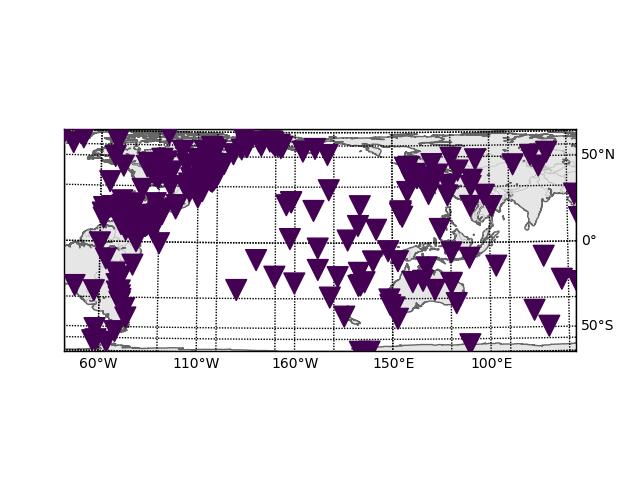

<IPython.core.display.Javascript object>


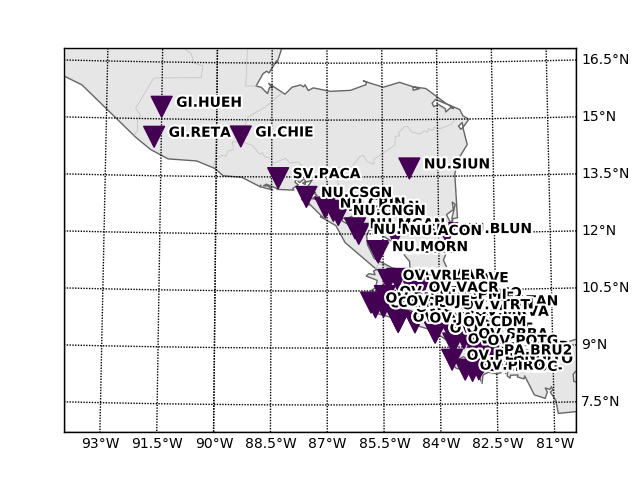

In [12]:
f=network.plot(color=1,projection='local')
f=rtnetwork.plot(color=1,projection='local')

In [13]:
from numpy import loadtxt

lines = loadtxt("https://raw.githubusercontent.com/SeisComP3/seiscomp3/master/src/trunk/apps/processing/scautoloc/config/grid.conf")
grid=lines.transpose()

# for d$_4^{req}$ 

scautolocgridfile
20 grid-OVSICORI-Z0.conf
scautolocgridfile


<IPython.core.display.Javascript object>


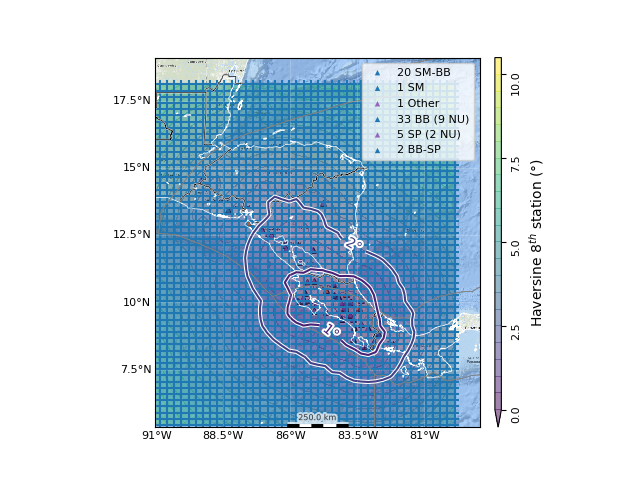

SV PACA ['SM', 'BB']
OV ORTG ['SM', 'BB']
OV CCOL ['SM', 'BB']
OV BATAN ['SM', 'BB']
OV CTCR ['SM', 'BB']
OV CAO2 ['SM', 'BB']
OV RIFO ['SM', 'BB']
OV COVE ['SM', 'BB']
OV PEZE ['SM', 'BB']
OV CDITO ['SM', 'BB']
OV OCM ['SM', 'BB']
OV JACO ['SM', 'BB']
OV HDC3 ['SM', 'BB']
OV OCHAL ['SM', 'BB']
OV VMAR ['SM', 'BB']
OV HAYA ['BB', 'SP']
OV DUNO ['SM', 'BB']
OV CDM ['SM', 'BB']
OV CPMI ['SM', 'BB']
OV SRBA ['SM', 'BB']
OV VACR ['BB', 'SP']
OV POTG ['SM', 'BB']
40 grid-OVSICORI-Z1.conf
scautolocgridfile
80 grid-OVSICORI-Z2.conf
scautolocgridfile
160 grid-OVSICORI-Z3.conf
scautolocgridfile


In [27]:
reload(eew.obspy_addons)
reload(eew.inventory_addons)
f = eew.inventory_addons.plot_traveltimes(rtnetwork,
                                          scautolocgrid=True,
                                          N=range(1,9),
                                          dmin=[8,0,0],
                                          depth=10,
                                          scautolocgridminn=4,
                                          scautolocgridfile='grid-OVSICORI-XXL.conf',
                                          grid=grid,
                                          plot='none',
                                          teleseism_min_stat=9
                                          )
args={'mapbounds':[[-86-4.5,-79.5],[6,14+4.5]]}
for i,depth in enumerate([20, 40, 80, 160]):
    print(depth,'grid-OVSICORI-Z%d.conf'%(i))
    f = eew.inventory_addons.plot_traveltimes(rtnetwork,
                                              N=range(1,9),
                                              dmin=[8,0,0],
                                              scautolocgridminn=4,
                                              scautolocgridfile='grid-OVSICORI-Z%d.conf'%(i),
                                              scautolocgrid=True,
                                              depth=depth,
                                              bits=3*1024,
                                              tmax=40.,
                                              teleseism_min_stat=9,
                                              **args
                                              )
    args['plot'] = 'none'

In [28]:
!cat grid-OVSICORI-Z*.conf > grid-OVSICORI.conf
!minmax grid-OVSICORI-XXL.conf
!minmax grid-OVSICORI.conf
!awk '$2<0{print $1,360+$2,$3,$4,$5,$6};$2>0{print $0}' grid-OVSICORI-XXL.conf > tmp.conf
!mv tmp.conf grid-OVSICORI-XXL.conf
!awk '$2<0{print $1,360+$2,$3,$4,$5,$6};$2>0{print $0}' grid-OVSICORI.conf > tmp.conf
!mv tmp.conf grid-OVSICORI.conf
!minmax grid-OVSICORI-XXL.conf
!minmax grid-OVSICORI.conf

minmax: Warning: module minmax is deprecated; use gmtinfo.
grid-OVSICORI-XXL.conf: N = 2120	<-90/90>	<-177.46/180>	<33/600>	<4/4>	<2.98/175.66>	<9/9>
minmax: Warning: module minmax is deprecated; use gmtinfo.
grid-OVSICORI.conf: N = 12544	<5.46/18.13>	<-94.6/-79.89>	<20/160>	<0.18/0.18>	<0.23/10.32>	<4/9>
minmax: Warning: module minmax is deprecated; use gmtinfo.
grid-OVSICORI-XXL.conf: N = 2120	<-90/90>	<0/355>	<33/600>	<4/4>	<2.98/175.66>	<9/9>
minmax: Warning: module minmax is deprecated; use gmtinfo.
grid-OVSICORI.conf: N = 12544	<5.46/18.13>	<266/281>	<20/160>	<0.18/0.18>	<0.23/10.32>	<4/9>


In [29]:
!rm grid-OVSICORI-XXL.filtered.conf
!rm grid-OVSICORI-merged.conf
!awk '(($1<5.46 || $1>18.13) && ($2<266 || $2>281)){print $0}' grid-OVSICORI-XXL.conf > grid-OVSICORI-XXL.filtered.conf
!cat grid-OVSICORI-XXL.filtered.conf grid-OVSICORI.conf  > grid-OVSICORI-merged.conf
!wc -l grid-OVSICORI-merged.conf grid-OVSICORI.conf grid-OVSICORI-XXL.conf grid-OVSICORI-XXL.filtered.conf
!scp grid-OVSICORI-merged.conf grid-OVSICORI.conf grid-OVSICORI-XXL.conf sysop@45.162.205.14:/opt/seiscomp3/etc/

   14566 grid-OVSICORI-merged.conf
   12544 grid-OVSICORI.conf
    2120 grid-OVSICORI-XXL.conf
    2022 grid-OVSICORI-XXL.filtered.conf
   31252 total
grid-OVSICORI-merged.conf                     100%  390KB 554.1KB/s   00:00    
grid-OVSICORI.conf                            100%  329KB 931.7KB/s   00:00    
grid-OVSICORI-XXL.conf                        100%   63KB 343.9KB/s   00:00    
